In [1]:
!pip install transformers datasets huggingface_hub --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.2 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from huggingface_hub import login


In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import HfFolder

# Save the token explicitly
HfFolder.save_token("Enter the token here")

# load the model & tokenizer using that token
model_name = "google/flan-t5-large"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name, use_auth_token=True)


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:823: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [4]:
import torch
torch.cuda.is_available()

True

In [5]:
!pip install -q peft accelerate bitsandbytes transformers datasets
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.6 MB/s eta 0:00:00


In [6]:
from datasets import load_dataset

# Load only the train split from healthcaremagic
dataset = load_dataset("lighteval/med_dialog", "healthcaremagic", split="train")

# Check a sample
print("Sample row:\n")
print(dataset[0])

med_dialog.py:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/118M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/181122 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22641 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22642 [00:00<?, ? examples/s]

Sample row:

{'tgt': 'How to overcome the problem of looking at the sex organs of males and females?', 'src': 'Patient: I am 57 years old man.  I had a problem of looking at the places of lower sex organs of male and female and afraid and not able to talk to them freely.This was started 27 years back and even though I took various medicines advised by psychiatrists I am not  cured of completely. At present I am using paxidep 12.5 mg and lonazep 0,25 mg. Can anyboxy advise me what to do? Doctor: It has been so many yrs that you are facing a difficult problem.it is ocd dear or obsessive and compulsive disorder.  Ssri helps but the dose you are taking is very less to be effective. Visit a psychiatrist , ask for increasing dose or change to fluoxetine.', 'id': 209519}


In [7]:
# We'll store parsed Q→A examples here
examples = []

for row in dataset:
    src_text = row["src"]

    # Check both Patient and Doctor tags are present
    if "Patient:" in src_text and "Doctor:" in src_text:
        try:
            # Extract patient question
            patient_part = src_text.split("Patient:")[1].split("Doctor:")[0].strip()

            # Extract doctor answer
            doctor_part = src_text.split("Doctor:")[1].strip()

            if patient_part and doctor_part:
                examples.append({
                    "input": f"Question: {patient_part}\nAnswer:",
                    "output": doctor_part
                })
        except:
            continue

print(f"Total parsed Q→A examples: {len(examples)}")
print("Sample:\n", examples[0])


Total parsed Q→A examples: 181117
Sample:
 {'input': 'Question: I am 57 years old man.  I had a problem of looking at the places of lower sex organs of male and female and afraid and not able to talk to them freely.This was started 27 years back and even though I took various medicines advised by psychiatrists I am not  cured of completely. At present I am using paxidep 12.5 mg and lonazep 0,25 mg. Can anyboxy advise me what to do?\nAnswer:', 'output': 'It has been so many yrs that you are facing a difficult problem.it is ocd dear or obsessive and compulsive disorder.  Ssri helps but the dose you are taking is very less to be effective. Visit a psychiatrist , ask for increasing dose or change to fluoxetine.'}


In [8]:
from datasets import Dataset
from transformers import AutoTokenizer

# Convert examples list into a Hugging Face Dataset
dataset = Dataset.from_list(examples)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenization function
def preprocess(example):
    inputs = tokenizer(example["input"], truncation=True, padding="max_length", max_length=256)
    targets = tokenizer(example["output"], truncation=True, padding="max_length", max_length=256)
    inputs["labels"] = targets["input_ids"]
    return inputs

# Apply tokenization
tokenized_dataset = dataset.map(preprocess, batched=True)

# (Optional) Reduce to subset for Colab testing
tokenized_dataset = tokenized_dataset.select(range(100))

print(" Tokenization complete. Sample:")
print(tokenized_dataset[0])


Map:   0%|          | 0/181117 [00:00<?, ? examples/s]

 Tokenization complete. Sample:
{'input': 'Question: I am 57 years old man.  I had a problem of looking at the places of lower sex organs of male and female and afraid and not able to talk to them freely.This was started 27 years back and even though I took various medicines advised by psychiatrists I am not  cured of completely. At present I am using paxidep 12.5 mg and lonazep 0,25 mg. Can anyboxy advise me what to do?\nAnswer:', 'output': 'It has been so many yrs that you are facing a difficult problem.it is ocd dear or obsessive and compulsive disorder.  Ssri helps but the dose you are taking is very less to be effective. Visit a psychiatrist , ask for increasing dose or change to fluoxetine.', 'input_ids': [11860, 10, 27, 183, 3, 3436, 203, 625, 388, 5, 27, 141, 3, 9, 682, 13, 479, 44, 8, 1747, 13, 1364, 3, 7, 994, 3640, 7, 13, 5069, 11, 3955, 11, 7403, 11, 59, 3, 179, 12, 1350, 12, 135, 14019, 5, 3713, 47, 708, 2307, 203, 223, 11, 237, 713, 27, 808, 796, 16766, 10058, 57, 31925, 

In [9]:
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq

# Define training configuration
training_args = TrainingArguments(
    output_dir="./flan_t5_baseline_healthcare",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=1,                    # Increase to 3+ for better learning
    eval_strategy="no",              # Skip evaluation for now
    save_strategy="epoch",
    learning_rate=5e-5,
    fp16=True,                             # Use FP16 if on GPU
    logging_steps=10,
    save_total_limit=1,
    report_to="none"
)

# Data collator handles dynamic padding
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Start training
trainer.train()

<ipython-input-9-115917d5776a>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,0.000000
20,0.000000
30,0.000000
40,0.000000
50,0.000000
60,0.000000
70,0.000000
80,0.000000
90,0.000000
100,0.000000


TrainOutput(global_step=100, training_loss=0.0, metrics={'train_runtime': 224.698, 'train_samples_per_second': 0.445, 'train_steps_per_second': 0.445, 'total_flos': 115238397542400.0, 'train_loss': 0.0, 'epoch': 1.0})

In [13]:
!pip install evaluate bert_score --quiet
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=86054a4a9c9807a137ef24996247da0a87fcb81333ff382fdb1adcc9299f54bf
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [14]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import evaluate
from bert_score import score as bertscore
import numpy as np
import string

# Load model and tokenizer (assumes already trained or fine-tuned)
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

# Load the CSV file with questions and reference answers
benchmark_df = pd.read_csv("Medical_QA_Benchmark_Set.csv")

# Generate answers
generated_answers = []

for question in benchmark_df["question"]:
    prompt = (
        "You are a professional AI healthcare assistant trained on trustworthy medical resources. "
        "Please answer the following patient question with accurate, evidence-based information. "
        "Your response should be clear, informative, and structured into the following:\n\n"
        "1. Introduction: Briefly summarize the context of the condition or concern.\n"
        "2. Possible Causes: Explain the common causes or underlying issues.\n"
        "3. Recommended Steps: Suggest evidence-based steps, remedies, or treatments.\n"
        "4. When to See a Doctor: Clearly mention any warning signs or when medical advice is necessary.\n\n"
        f"Patient Question: {question}\n\n"
        "Answer:"
    )

    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    outputs = model.generate(
        input_ids=input_ids,
        max_length=512,
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=3
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    generated_answers.append(response)

# Store generated answers
benchmark_df["generated_answer"] = generated_answers
benchmark_df.to_csv("Benchmark_with_Generated_Answers_base.csv", index=False)

# Evaluation setup
predictions = benchmark_df["generated_answer"].astype(str).tolist()
references = benchmark_df["reference_answer"].astype(str).tolist()

# Function to normalize text
def normalize(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation)).strip()

# Compute token-level F1
def compute_token_f1(preds, refs):
    f1s = []
    for pred, ref in zip(preds, refs):
        pred_tokens = normalize(pred).split()
        ref_tokens = normalize(ref).split()
        common = set(pred_tokens) & set(ref_tokens)
        if not common:
            f1s.append(0)
            continue
        precision = len(common) / len(pred_tokens)
        recall = len(common) / len(ref_tokens)
        f1 = 2 * precision * recall / (precision + recall)
        f1s.append(f1)
    return round(np.mean(f1s) * 100, 2)

# BERTScore (F1)
P, R, F1 = bertscore(predictions, references, lang="en")
bert_f1_score = round(F1.mean().item() * 100, 2)

# BLEU Score
bleu = evaluate.load("bleu")
bleu_result = bleu.compute(predictions=predictions, references=[[r] for r in references])
bleu_score_value = round(bleu_result["bleu"] * 100, 2)

# ROUGE-L Score
rouge = evaluate.load("rouge")
rouge_result = rouge.compute(predictions=predictions, references=references)
rouge_l_score = round(rouge_result["rougeL"] * 100, 2)

# Token-level F1
token_f1_score = compute_token_f1(predictions, references)

# Output results
print("\n📊 Evaluation Metrics")
print(f"✅ BERTScore (F1): {bert_f1_score}%")
print(f"✅ BLEU Score: {bleu_score_value}%")
print(f"✅ ROUGE-L Score: {rouge_l_score}%")
print(f"✅ Token-level F1 Score: {token_f1_score}%")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📊 Evaluation Metrics
✅ BERTScore (F1): 88.87%
✅ BLEU Score: 2.6%
✅ ROUGE-L Score: 24.63%
✅ Token-level F1 Score: 28.53%


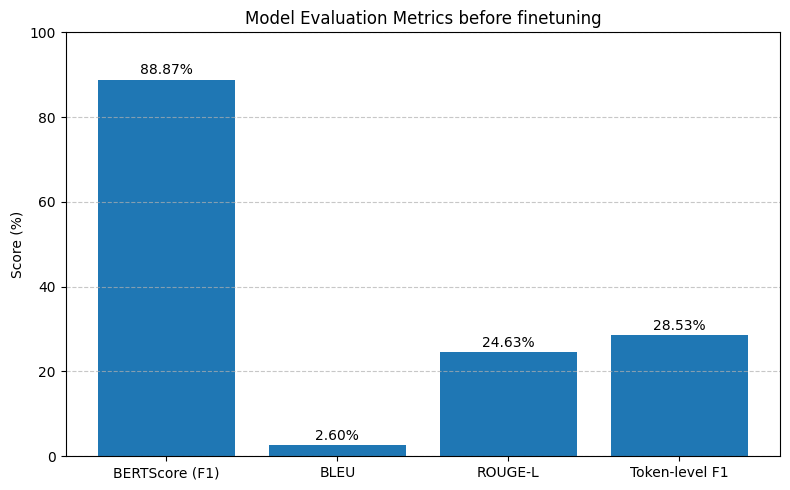

In [27]:
import matplotlib.pyplot as plt

# Data for plotting
metrics = ["BERTScore (F1)", "BLEU", "ROUGE-L", "Token-level F1"]
scores = [bert_f1_score, bleu_score_value, rouge_l_score, token_f1_score]

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

# Chart formatting
plt.ylim(0, 100)
plt.ylabel("Score (%)")
plt.title("Model Evaluation Metrics before finetuning")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [16]:
from peft import get_peft_model, LoraConfig, TaskType
from transformers import AutoModelForSeq2SeqLM

# Load Flan-T5 Large model
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Define improved LoRA configuration
lora_config = LoraConfig(
    r=16,                              # Increased rank for better adaptation
    lora_alpha=32,                     # Scaling factor
    target_modules=["q", "v", "k", "o"],  # Apply LoRA to more attention components
    lora_dropout=0.05,                 # Reduced dropout for better stability
    bias="none",
    task_type=TaskType.SEQ_2_SEQ_LM
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)

# Print number of trainable parameters (sanity check)
model.print_trainable_parameters()




trainable params: 9,437,184 || all params: 792,587,264 || trainable%: 1.1907


In [17]:
from transformers import TrainingArguments, Trainer, DataCollatorForSeq2Seq

# Training config
training_args = TrainingArguments(
    output_dir="./flan_t5_lora_healthcare",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    num_train_epochs=1,
    eval_strategy="no",
    save_strategy="epoch",
    learning_rate=5e-5,
    fp16=True,
    logging_steps=50,
    save_total_limit=1,
    report_to="none"
)

# Data collator handles padding
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

# Setup trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)


<ipython-input-17-d48d0e1e0786>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [18]:
trainer.train()


Step,Training Loss
50,0.000000
100,0.000000


TrainOutput(global_step=100, training_loss=0.0, metrics={'train_runtime': 86.7055, 'train_samples_per_second': 1.153, 'train_steps_per_second': 1.153, 'total_flos': 116687949004800.0, 'train_loss': 0.0, 'epoch': 1.0})

In [19]:
from transformers import AutoModelForSeq2SeqLM

# Create the prompt
prompt = "Question: What causes persistent pain in the back post a spinal surgery?\nAnswer:"
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)

# Generate output
outputs = model.generate(input_ids=input_ids, max_length=256)
response = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(" Model Response:\n", response)


 Model Response:
 spinal cord damage


In [20]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the CSV file with questions
benchmark_df = pd.read_csv("Medical_QA_Benchmark_Set.csv")

# Generate answers
generated_answers = []

for question in benchmark_df["question"]:
    # Updated structured and evidence-based prompt
    prompt = (
        "You are a professional AI healthcare assistant trained on trustworthy medical resources. "
        "Please answer the following patient question with accurate, evidence-based information. "
        "Your response should be clear, informative, and structured into the following:\n\n"
        "1. Introduction: Briefly summarize the context of the condition or concern.\n"
        "2. Possible Causes: Explain the common causes or underlying issues.\n"
        "3. Recommended Steps: Suggest evidence-based steps, remedies, or treatments.\n"
        "4. When to See a Doctor: Clearly mention any warning signs or when medical advice is necessary.\n\n"
        f"Patient Question: {question}\n\n"
        "Answer:"
    )
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)

    outputs = model.generate(
        input_ids=input_ids,
        max_length=512,
        num_beams=4,
        early_stopping=True,
        no_repeat_ngram_size=3
    )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    generated_answers.append(response)

# Store generated answers
benchmark_df["generated_answer"] = generated_answers

# Preview
print(benchmark_df.head())

# Save the updated dataset
benchmark_df.to_csv("Benchmark_with_Generated_Answers.csv", index=False)


                                      question  \
0              Is fever in children dangerous?   
1                  What is insulin resistance?   
2  What are the early signs of a heart attack?   
3                     What causes diaper rash?   
4           What are the symptoms of diabetes?   

                                    reference_answer  \
0  A mild fever is usually not dangerous and can ...   
1  A condition where cells don't respond properly...   
2  Chest pain, shortness of breath, nausea, and c...   
3  Diaper rash is caused by prolonged exposure to...   
4  Increased thirst, frequent urination, fatigue,...   

                                    generated_answer  
0             Fever is a common symptom in children.  
1  Insulin resistance is a condition in which the...  
2  The early signs of a heart attack include a sy...  
3  Diaper rash is a common condition that can be ...  
4                      Symptoms of diabetes include:  


In [33]:
df = pd.read_csv("/content/Benchmark_with_Generated_Answers.csv")


# Store generated answers
benchmark_df["generated_answer"] = generated_answers
benchmark_df.to_csv("Benchmark_with_Generated_Answers_base.csv", index=False)

# Evaluation setup
predictions = benchmark_df["generated_answer"].astype(str).tolist()
references = benchmark_df["reference_answer"].astype(str).tolist()

# Function to normalize text
def normalize(text):
    return text.lower().translate(str.maketrans('', '', string.punctuation)).strip()

# Compute token-level F1
def compute_token_f1(preds, refs):
    f1s = []
    for pred, ref in zip(preds, refs):
        pred_tokens = normalize(pred).split()
        ref_tokens = normalize(ref).split()
        common = set(pred_tokens) & set(ref_tokens)
        if not common:
            f1s.append(0)
            continue
        precision = len(common) / len(pred_tokens)
        recall = len(common) / len(ref_tokens)
        f1 = 2 * precision * recall / (precision + recall)
        f1s.append(f1)
    return round(np.mean(f1s) * 100, 2)

# BERTScore (F1)
P, R, F1 = bertscore(predictions, references, lang="en")
bert_f1_score = round(F1.mean().item() * 100, 2)

# BLEU Score
bleu = evaluate.load("bleu")
bleu_result = bleu.compute(predictions=predictions, references=[[r] for r in references])
bleu_score_value = round(bleu_result["bleu"] * 100, 2)

# ROUGE-L Score
rouge = evaluate.load("rouge")
rouge_result = rouge.compute(predictions=predictions, references=references)
rouge_l_score = round(rouge_result["rougeL"] * 100, 2)

# Token-level F1
token_f1_score = compute_token_f1(predictions, references)

# Output results
print("\n📊 Evaluation Metrics")
print(f"✅ BERTScore (F1): {bert_f1_score}%")
print(f"✅ BLEU Score: {bleu_score_value}%")
print(f"✅ ROUGE-L Score: {rouge_l_score}%")
print(f"✅ Token-level F1 Score: {token_f1_score}%")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📊 Evaluation Metrics
✅ BERTScore (F1): 88.03%
✅ BLEU Score: 5.16%
✅ ROUGE-L Score: 22.07%
✅ Token-level F1 Score: 25.39%


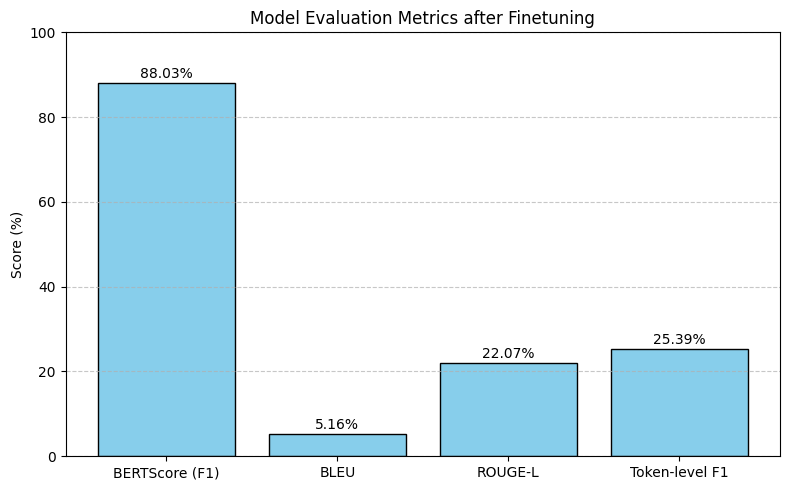

In [34]:
# --- BAR CHART VISUALIZATION ---

# Data for plotting
metrics = ["BERTScore (F1)", "BLEU", "ROUGE-L", "Token-level F1"]
scores = [bert_f1_score, bleu_score_value, rouge_l_score, token_f1_score]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color='skyblue', edgecolor='black')

# Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom')

plt.ylim(0, 100)
plt.ylabel("Score (%)")
plt.title("Model Evaluation Metrics after Finetuning")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
model.save_pretrained("./flan_t5_lora_healthcare")
# Save only the LoRA adapter
model.save_pretrained("flan_t5_lora_adapter")  # ← This will generate adapter_config.json and adapter_model.bin

In [ ]:
import torch

# Ensure model is in evaluation mode
model.eval()

print("🩺 Healthcare AI Chatbot — type 'exit' to quit.")
while True:
    question = input("\n🧑 Patient: ")
    if question.lower() in ["exit", "quit"]:
        break

    # Structured evidence-based prompt
    prompt = (
        "You are a professional AI healthcare assistant trained on trustworthy medical resources. "
        "Please answer the following patient question with accurate, evidence-based information. "
        "Your response should be clear, informative, and structured into the following:\n\n"
        "1. Introduction: Briefly summarize the context of the condition or concern.\n"
        "2. Possible Causes: Explain the common causes or underlying issues.\n"
        "3. Recommended Steps: Suggest evidence-based steps, remedies, or treatments.\n"
        "4. When to See a Doctor: Clearly mention any warning signs or when medical advice is necessary.\n\n"
        f"Patient Question: {question}\n\n"
        "Answer:"
    )

    # Tokenize and generate
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    with torch.no_grad():
        outputs = model.generate(
          input_ids=input_ids,
          max_length=768,
          temperature=0.7,
          num_beams=4,
          early_stopping=False,
          no_repeat_ngram_size=3
)

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)



    print(f"\n🤖 AI Assistant:\n{response}")


In [29]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.4 MB/s eta 0:00:00


In [35]:
import gradio as gr
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the model and tokenizer
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.eval()
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

# Response generation function
def generate_answer(question):
    prompt = (
        "You are a professional AI healthcare assistant trained on trustworthy medical resources. "
        "Please answer the following patient question with accurate, evidence-based information. "
        "Your response should be clear, informative, and structured into the following:\n\n"
        "1. Introduction: Briefly summarize the context of the condition or concern.\n"
        "2. Possible Causes: Explain the common causes or underlying issues.\n"
        "3. Recommended Steps: Suggest evidence-based steps, remedies, or treatments.\n"
        "4. When to See a Doctor: Clearly mention any warning signs or when medical advice is necessary.\n\n"
        f"Patient Question: {question}\n\n"
        "Answer:"
    )

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, padding=True).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_length=512,
            num_beams=4,
            no_repeat_ngram_size=3,
            early_stopping=True
        )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Function for handling chat message interaction
def respond(message, history):
    answer = generate_answer(message)
    history.append((message, answer))
    return "", history

# Gradio Chat UI
with gr.Blocks() as chat_ui:
    gr.Markdown("## 🩺 Medical QA Chatbot")
    gr.Markdown("Ask any health-related question. I'll give you a clear, patient-friendly explanation.")

    chatbot = gr.Chatbot()
    msg = gr.Textbox(label="Ask a Question", placeholder="e.g., What are the symptoms of covid?")
    clear = gr.Button("🧹 Clear Chat")

    msg.submit(respond, [msg, chatbot], [msg, chatbot])
    clear.click(lambda: None, None, chatbot, queue=False)

chat_ui.launch(share=True)


<ipython-input-35-63a10b886cd5>:51: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://abb5f656a1649ed004.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
